In [339]:
import pandas as pd
import numpy as np


In [340]:
with open("Sankt_Augustin.json", encoding="utf-8") as file:
    text = file.read()
    sankt_augustin_data = json.loads(text)

In [341]:
sankt_augustin_data["backlinks"][len(sankt_augustin_data["backlinks"])-1]
filtered = [e for e in sankt_augustin_data["backlinks"]if type(e["views"]) == list]
filtered2 = [e for e in filtered if len(e["views"]) == 93]

In [342]:
sum = np.array(len(filtered2[0]["views"]))
sum.fill(0)
for i in range(len(filtered2)):
    sum = sum + np.array([e["views"] for e in filtered2[i]["views"]])
sum

array([20481, 20750, 19503, 20807, 20965, 19247, 17874, 16652, 19190,
       21145, 19549, 19329, 19393, 18874, 19672, 22480, 21347, 26294,
       27592, 22082, 20935, 26856, 20872, 23340, 23504, 20951, 21306,
       19373, 17614, 19883, 19226, 25986, 20725, 20670, 19241, 17927,
       19263, 19030, 19062, 19545, 18354, 18052, 21570, 23304, 20631,
       21496, 43509, 23373, 21091, 23995, 24883, 21694, 20453, 19967,
       24555, 19870, 19626, 20425, 20109, 20098, 20739, 53751, 52990,
       31231, 28798, 26598, 22596, 21666, 23323, 21235, 18532, 18454,
       18512, 20674, 20775, 19682, 19018, 17488, 21773, 21755, 21332,
       21708, 20405, 19659, 18188, 19250, 18926, 19916, 20604, 23507,
       21874, 19369, 20825])

In [343]:
import matplotlib.pyplot as plt

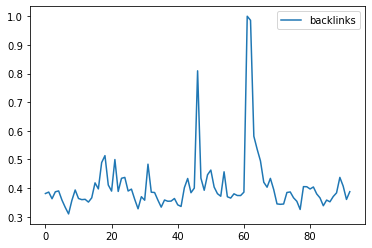

In [357]:
sum = sum/sum.max()
plt.plot(sum, label="backlinks")
plt.legend()


In [345]:
base = sankt_augustin_data["baselink"]["views"]
base = np.array([e["views"] for e in base])
base #= base / base.max()

array([328, 233, 208, 212, 235, 212, 179, 129, 162, 184, 154, 198, 158,
       136, 111, 148, 166, 173, 160, 148, 133, 137, 129, 176, 182, 151,
       159, 213, 126, 139, 158, 229, 172, 176, 155, 158, 131, 161, 186,
       190, 181, 132, 136, 137, 187, 142, 186, 138, 143, 161, 207, 181,
       209, 159, 181, 213, 195, 156, 185, 196, 171, 197, 174, 168, 185,
       163, 163, 134, 153, 126, 143, 142, 161, 175, 177, 141, 137, 153,
       157, 151, 136, 163, 180, 132, 177, 151, 159, 165, 164, 140, 148,
       135, 138])

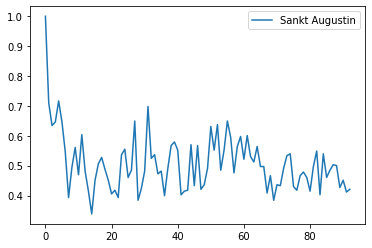

In [360]:
plt.plot(base, label="Sankt Augustin")
plt.legend()

In [347]:
filteredL = [e for e in sankt_augustin_data["links"]if type(e["views"]) == list]
filteredL = [e for e in filteredL if len(e["views"]) == 93]

base = base / base.max()

sum_link = np.array(len(filteredL[0]["views"]))
sum_link.fill(0)
for i in range(len(filteredL)):
    sum_link = sum_link + np.array([e["views"] for e in filteredL[i]["views"]])
#sum_link = np.array([e["views"] for e in filteredL])
sum_link = sum_link/ sum_link.max()

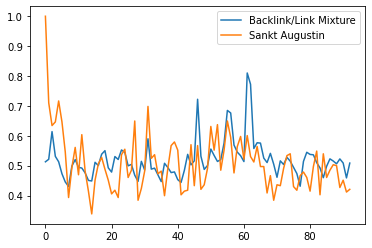

In [359]:
plt.plot((sum_link + sum)/2,label="Backlink/Link Mixture")
plt.plot(base, label="Sankt Augustin")
plt.legend()

In [378]:
from itertools import compress
top50 = list(compress(filtered2,[e["position"] < 50 for e in filtered2]))
sum_top50 = np.array(len(top50))
sum_top50.fill(0)
for i in range(len(top50)):
    sum_top50 = sum_top50 + np.array([e["views"] for e in top50[i]["views"]])
sum_top50 =  sum_top50/sum_top50.max()

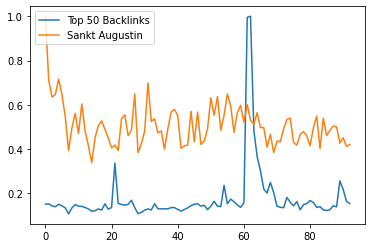

In [398]:
plt.plot(sum_top50,label="Top 50 Backlinks")
plt.plot(base,label="Sankt Augustin")
plt.legend()

In [351]:
link_top = filteredL[:50]
sum_top = np.zeros(len(link_top[0]["views"]))
print(link_top[0])
for i in range(len(link_top)):
    sum_top = sum_top + np.array([e["views"] for e in link_top[i]["views"]])
sum_top =  sum_top/sum_top.max()

{'name': 'St. Augustin', 'views': [{'date': '2023070100', 'views': 11}, {'date': '2023070200', 'views': 8}, {'date': '2023070300', 'views': 15}, {'date': '2023070400', 'views': 4}, {'date': '2023070500', 'views': 4}, {'date': '2023070600', 'views': 8}, {'date': '2023070700', 'views': 2}, {'date': '2023070800', 'views': 0}, {'date': '2023070900', 'views': 12}, {'date': '2023071000', 'views': 8}, {'date': '2023071100', 'views': 8}, {'date': '2023071200', 'views': 1}, {'date': '2023071300', 'views': 6}, {'date': '2023071400', 'views': 4}, {'date': '2023071500', 'views': 10}, {'date': '2023071600', 'views': 12}, {'date': '2023071700', 'views': 12}, {'date': '2023071800', 'views': 2}, {'date': '2023071900', 'views': 7}, {'date': '2023072000', 'views': 10}, {'date': '2023072100', 'views': 10}, {'date': '2023072200', 'views': 2}, {'date': '2023072300', 'views': 9}, {'date': '2023072400', 'views': 8}, {'date': '2023072500', 'views': 4}, {'date': '2023072600', 'views': 6}, {'date': '2023072700'

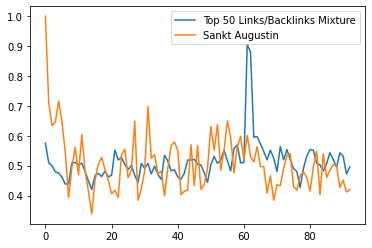

In [400]:
plt.plot((sum_top + sum_top50)/2,label="Top 50 Links/Backlinks Mixture")
plt.plot(base,label="Sankt Augustin")
plt.legend()

In [416]:
import random
link_random = random.choices(filteredL, k=50)
sum_random = np.zeros(len(link_random[0]["views"]))
for i in range(len(link_random)):
    sum_random = sum_random + np.array([e["views"] for e in link_random[i]["views"]])
sum_random = sum_random / sum_random.max()

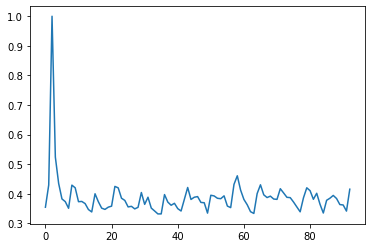

In [417]:
plt.plot(sum_random,label="Random Links")

In [418]:
import random
backlink_random = random.choices(filtered2, k=50)
sumb_random = np.zeros(len(backlink_random[0]["views"]))
for i in range(len(backlink_random)):
    sumb_random = sumb_random + np.array([e["views"] for e in backlink_random[i]["views"]])
sumb_random = sumb_random / sumb_random.max()

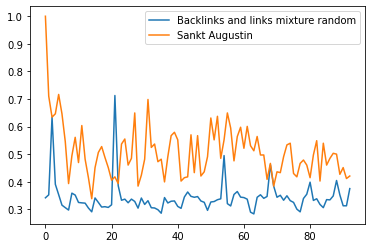

In [422]:
plt.plot((sumb_random + sum_random)/2,label="Backlinks and links mixture random")
plt.plot(base,label="Sankt Augustin")
plt.legend()

Normalize Test
Was passiert wenn man erst normalisiert?

In [404]:
link_top = filteredL[:50]
sum_top2 = np.zeros(len(link_top[0]["views"]))
print(link_top[0])
for i in range(len(link_top)):
    temp_array = np.array([e["views"] for e in link_top[i]["views"]])
    temp_array = temp_array / temp_array.max()
    sum_top2 = sum_top2 + temp_array
sum_top2 = sum_top2 / sum_top2.max()


{'name': 'St. Augustin', 'views': [{'date': '2023070100', 'views': 11}, {'date': '2023070200', 'views': 8}, {'date': '2023070300', 'views': 15}, {'date': '2023070400', 'views': 4}, {'date': '2023070500', 'views': 4}, {'date': '2023070600', 'views': 8}, {'date': '2023070700', 'views': 2}, {'date': '2023070800', 'views': 0}, {'date': '2023070900', 'views': 12}, {'date': '2023071000', 'views': 8}, {'date': '2023071100', 'views': 8}, {'date': '2023071200', 'views': 1}, {'date': '2023071300', 'views': 6}, {'date': '2023071400', 'views': 4}, {'date': '2023071500', 'views': 10}, {'date': '2023071600', 'views': 12}, {'date': '2023071700', 'views': 12}, {'date': '2023071800', 'views': 2}, {'date': '2023071900', 'views': 7}, {'date': '2023072000', 'views': 10}, {'date': '2023072100', 'views': 10}, {'date': '2023072200', 'views': 2}, {'date': '2023072300', 'views': 9}, {'date': '2023072400', 'views': 8}, {'date': '2023072500', 'views': 4}, {'date': '2023072600', 'views': 6}, {'date': '2023072700'

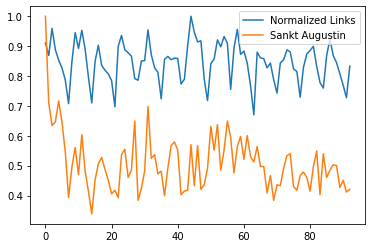

In [412]:
plt.plot(sum_top2,label="Normalized Links")
plt.plot(base,label="Sankt Augustin")
plt.legend()

In [406]:
link_top = list(compress(filtered2,[e["position"] < 50 for e in filtered2]))
sum_topB = np.zeros(len(link_top[0]["views"]))
print(link_top[0])
for i in range(len(link_top)):
    temp_array = np.array([e["views"] for e in link_top[i]["views"]])
    temp_array = temp_array / temp_array.max()
    sum_topB = sum_topB + temp_array
sum_topB = sum_topB / sum_topB.max()

{'name': 'Hochschule Bonn-Rhein-Sieg', 'position': 1, 'views': [{'date': '2023070100', 'views': 29}, {'date': '2023070200', 'views': 30}, {'date': '2023070300', 'views': 41}, {'date': '2023070400', 'views': 45}, {'date': '2023070500', 'views': 143}, {'date': '2023070600', 'views': 31}, {'date': '2023070700', 'views': 41}, {'date': '2023070800', 'views': 32}, {'date': '2023070900', 'views': 40}, {'date': '2023071000', 'views': 44}, {'date': '2023071100', 'views': 51}, {'date': '2023071200', 'views': 50}, {'date': '2023071300', 'views': 36}, {'date': '2023071400', 'views': 33}, {'date': '2023071500', 'views': 34}, {'date': '2023071600', 'views': 29}, {'date': '2023071700', 'views': 33}, {'date': '2023071800', 'views': 42}, {'date': '2023071900', 'views': 40}, {'date': '2023072000', 'views': 25}, {'date': '2023072100', 'views': 60}, {'date': '2023072200', 'views': 40}, {'date': '2023072300', 'views': 40}, {'date': '2023072400', 'views': 47}, {'date': '2023072500', 'views': 43}, {'date': '

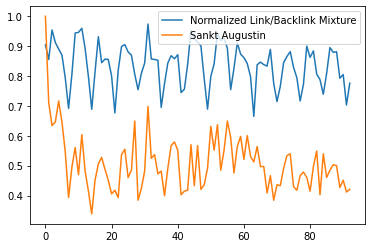

In [411]:
plt.plot((sum_topB +sum_top2) / 2,label="Normalized Link/Backlink Mixture")
plt.plot(base, label="Sankt Augustin")
plt.legend()

In [409]:
interesting = list(compress(filtered2,[e["position"] == 31 for e in filtered2]))
interesting[0]["views"][60:70]

[{'date': '2023083000', 'views': 1649},
 {'date': '2023083100', 'views': 33891},
 {'date': '2023090100', 'views': 34906},
 {'date': '2023090200', 'views': 15405},
 {'date': '2023090300', 'views': 10261},
 {'date': '2023090400', 'views': 6383},
 {'date': '2023090500', 'views': 4209},
 {'date': '2023090600', 'views': 2915},
 {'date': '2023090700', 'views': 2260},
 {'date': '2023090800', 'views': 2439}]

In [410]:
interesting[0]

{'name': 'Oliver Pocher',
 'position': 31,
 'views': [{'date': '2023070100', 'views': 1364},
  {'date': '2023070200', 'views': 1520},
  {'date': '2023070300', 'views': 979},
  {'date': '2023070400', 'views': 897},
  {'date': '2023070500', 'views': 629},
  {'date': '2023070600', 'views': 440},
  {'date': '2023070700', 'views': 1041},
  {'date': '2023070800', 'views': 673},
  {'date': '2023070900', 'views': 1312},
  {'date': '2023071000', 'views': 1258},
  {'date': '2023071100', 'views': 695},
  {'date': '2023071200', 'views': 391},
  {'date': '2023071300', 'views': 528},
  {'date': '2023071400', 'views': 854},
  {'date': '2023071500', 'views': 416},
  {'date': '2023071600', 'views': 408},
  {'date': '2023071700', 'views': 345},
  {'date': '2023071800', 'views': 386},
  {'date': '2023071900', 'views': 1277},
  {'date': '2023072000', 'views': 735},
  {'date': '2023072100', 'views': 767},
  {'date': '2023072200', 'views': 881},
  {'date': '2023072300', 'views': 998},
  {'date': '2023072400

In [424]:
from datetime import datetime
dates = [datetime.strptime(entry["date"], "%Y%m%d%H") for entry in interesting[0]["views"]]
views = [entry["views"] for entry in interesting[0]["views"]]


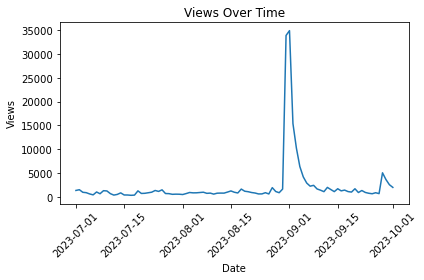

In [426]:
plt.plot(dates, views)
plt.xlabel('Date')
plt.ylabel('Views')
plt.title('Views Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()